# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

# BUSINESS QUESTIONS

We answer the questions asked by the Sales Rep with the information collected below.

### **- How many customers were there for each approach?**

The **total number** of customers after removing both those rows of data that contain missing values and those that show inconsistent data is **13924**.

**Email**: 6921

**Call**: 4780

**Email and Call**: 2223

### **- What does the spread of the revenue look like overall? And for each method?**

The overall distribution of revenue does not follow a normal pattern and is skewed to the right, as illustrated in graph 4. This skewness indicates that there are a significant number of higher revenue values pulling the distribution to the right side. Additionally, the distribution features five distinct peaks, suggesting multiple concentrations of revenue values within the data.

**Analysis by Sales Method:**

**_Call Method:_**

This method demonstrates the smallest spread and the lowest median revenue among the three sales methods. The interquartile range (IQR), which measures the middle 50% of the data, is $11 (refer to graph 6). This indicates that the revenue values for the Call method are closely clustered around the median with less variability.

_**Email Method:**_

The Email method has a somewhat wider spread and a higher median revenue compared to the Call method. The interquartile range for the Email method is $17 (see graph 6), suggesting a moderate level of variability in revenue values. This method's revenue values are more spread out than those of the Call method but still relatively concentrated.

**_Email + Call Method:_**

This method shows the largest spread and the highest median revenue among the three methods. The interquartile range is $35 (see graph 6), indicating a significant variability in revenue values. The wide spread suggests that while this method can generate high revenues, there is also a considerable range of revenue outcomes.

**Profitability Insights:**

**_Email + Call Method:_**

Despite its higher spread and median revenue, making it appear to be the most lucrative option, the Email + Call method is not the most effective in terms of total revenue generated. This is due to its lower usage compared to the Email-only method.

**Email Method:**

The Email-only method, although having a lower median and spread compared to the Email + Call method, ends up generating more total revenue. This is attributed to its higher frequency of use, making it the most productive in terms of overall revenue.

**Call Method:**

The Call method performs the worst among the three. It is not only the least profitable but also the most costly to implement. With the lowest revenue outcomes and high implementation costs, this method is the least efficient and effective.

### **- Was there any difference in revenue over time for each of the methods?**
Yes, the revenue for each sales method has indeed increased over time; however, the extent of this increase differs across the methods, as illustrated in graph 7.

**Call Method:**

The Call method experienced the smallest increase in revenue. The average revenue for this method was \$35 in week 1. By week 6, the average revenue had risen to \$66. This represents an increase of \$31 over the six-week period (refer to graph 7).

**Email Method:**

The Email method saw a moderate increase in revenue. Initially, the average revenue in week 1 was \$87. By week 6, this average had grown to \$130, resulting in an increase of \$43. This change is more significant compared to the Call method, but still less than the combined method (see graph 7).

**Email + Call Method:**

The Email + Call method exhibited the most substantial increase in revenue among the three methods. In week 1, the average revenue was \$128. By week 6, this average had surged to \$227, marking a remarkable increase of \$99. This substantial growth underscores the effectiveness of the combined approach over time (see graph 7).

In summary, while all methods showed an increase in revenue over the observed period, the increase was uneven as the weeks passed. The Email + Call method demonstrated the greatest growth, followed by the Email method, and finally the Call method, which had the smallest increase.

### **- Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.**

I suggest that the company continue using the Email + Call method due to its ability to generate higher revenues and its potential for substantial growth over time, as illustrated in Chart 7. However, in light of the effort employed for each of the methods, as we can see in the calculated metric, the Email method manages to obtain large revenues with very little effort, allowing it to reach a greater number of customers.

# **DATA VALIDATION**

**Columns required for the analysis.**

In [1]:
import pandas as pd

# Definir la ruta del archivo CSV
archivo_csv = 'product_sales.csv'

# Leer el archivo CSV en un DataFrame de Pandas
df = pd.read_csv(archivo_csv)

# Mostrar las primeras filas del DataFrame para verificar
print(df.tail())

       week  sales_method  ... nb_site_visits          state
14995     4          Call  ...             22   Pennsylvania
14996     5          Call  ...             27         Kansas
14997     1          Call  ...             22  West Virginia
14998     6          Call  ...             27     New Jersey
14999     5  Email + Call  ...             25       Illinois

[5 rows x 8 columns]


In [2]:
df.columns

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

In [3]:
# List of all columns expected in the database
expected_columns = [
    'week', 'sales_method', 'customer_id', 'nb_sold', 
    'revenue', 'years_as_customer', 'nb_site_visits', 'state'
]

# Check if all expected columns are present in the DataFrame
missing_columns = [col for col in expected_columns if col not in df.columns]

if len(missing_columns) == 0:
    print("The database contains all the specified columns.")
else:
    print("The database is missing the following columns:")
    for col in missing_columns:
        print(col)

The database contains all the specified columns.


The provided code offers a practical method to verify if the database contains all specified columns required for analysis. By defining expected_columns with the anticipated column names, the code checks against the actual columns present in the DataFrame (df.columns). If any columns from expected_columns are missing, it identifies and lists them, ensuring data integrity and completeness before proceeding with subsequent analyses or operations. This approach allows for early detection of potential issues in the dataset, prompting adjustments as needed to align with the expected structure for effective data handling and insights extraction.








**Missing Values.**

In [4]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)
print('-------------------------')
# Display columns with missing values, if any
if missing_values.sum() == 0:
    print("No missing values found in the database.")
else:
    print("The following columns have missing values:")
    print(missing_values[missing_values > 0])

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64
-------------------------
The following columns have missing values:
revenue    1074
dtype: int64


Using the isnull() function, we verified that there are 1,074 null values in the revenue column. However, there may be missing values that are not detected by the function due to their format. Therefore, we must check for these values to ensure data integrity.

The isnull() function is adept at identifying standard missing values such as NaN (Not a Number) or None in the dataset. Nonetheless, if the column revenue contains values in an incorrect format, such as strings or other non-numeric types that isnull() does not recognize as missing, these will not be captured in the initial check. For instance, entries like "N/A", "undefined", or empty strings can represent missing data but won't be flagged by isnull().

To address this, we must perform an additional check to identify any non-numeric entries in the revenue column. This involves verifying that each value is indeed a number (either integer or float) and not some other data type or format that should be considered as missing.

In [5]:
# Check for non-numeric values in the 'revenue' column
non_numeric_revenue = df['revenue'].apply(lambda x: not isinstance(x, (int, float)) or pd.isna(x))

print(len(df[non_numeric_revenue]))

1074


It is observed that there are no more missing values in that column than those already detected previously. The rows with missing values are eliminated.

In [6]:
df = df.dropna()
print('-------------------------')
print("Rows with missing values have been removed.")
df.reset_index(drop=True, inplace=True)
print('-------------------------')
print("Indexes have been reset.")
print("Updated DataFrame with reset indices:")
print(df)

-------------------------
Rows with missing values have been removed.
-------------------------
Indexes have been reset.
Updated DataFrame with reset indices:
       week  sales_method  ... nb_site_visits          state
0         6  Email + Call  ...             28         Kansas
1         5          Call  ...             26      Wisconsin
2         3         Email  ...             28       Illinois
3         6          Call  ...             24    Mississippi
4         4         Email  ...             28        Georgia
...     ...           ...  ...            ...            ...
13921     4         Email  ...             25           Ohio
13922     4          Call  ...             22   Pennsylvania
13923     5          Call  ...             27         Kansas
13924     1          Call  ...             22  West Virginia
13925     6          Call  ...             27     New Jersey

[13926 rows x 8 columns]


In [7]:
# Check for non-integer values in the 'week' column
non_integer_week = df['week'].apply(lambda x: not isinstance(x, int) or pd.isna(x))
print(len(df[non_integer_week]))

0


It is observed that in the week column there are no missing values ​​either because all the values are integers as expected.

In [8]:
# Check for invalid values in the 'sales_method' column
valid_sales_methods = ['Email', 'Call', 'Email + Call']
invalid_sales_method = df['sales_method'].apply(lambda x: x not in valid_sales_methods or pd.isna(x))
print(len(df[invalid_sales_method]))

27


In [9]:
df[invalid_sales_method]['sales_method']

18       em + call
556      em + call
1173     em + call
1560     em + call
1578         email
2026         email
3340     em + call
3343     em + call
3371     em + call
4110     em + call
4370     em + call
4809         email
4938         email
5083     em + call
5512     em + call
5560     em + call
5859         email
6085     em + call
6998     em + call
9175     em + call
10429        email
11664    em + call
11996    em + call
12360    em + call
12383    em + call
12808    em + call
12969        email
Name: sales_method, dtype: object

In [10]:
# Standardize values in the 'sales_method' column
df['sales_method'] = df['sales_method'].str.strip().replace(
    {'email': 'Email', 'em + call': 'Email + Call'}
)
# Check for invalid values in the 'sales_method' column
valid_sales_methods = ['Email', 'Call', 'Email + Call']
invalid_sales_method = df['sales_method'].apply(lambda x: x not in valid_sales_methods or pd.isna(x))
print(len(df[invalid_sales_method]))

0


33 values were detected that did not match the format of the column values ('Email', 'Call', 'Email + Call'). However, these were not missing values ​​so these parameters have been corrected to match the correct format.

In [11]:
# Check for non-integer values in the 'nb_sold' column
invalid_nb_sold = df['nb_sold'].apply(lambda x: not isinstance(x, int) or pd.isna(x))
print(len(df[invalid_nb_sold]))

0


In [12]:
# Check for non-integer values in the 'years_as_customer' column
invalid_years_as_customer = df['years_as_customer'].apply(lambda x: not isinstance(x, int) or pd.isna(x))
print(len(df[invalid_years_as_customer]))

0


In [13]:
# Check for non-integer values in the 'nb_site_visits' column
invalid_nb_site_visits = df['nb_site_visits'].apply(lambda x: not isinstance(x, int) or pd.isna(x))
print(len(df[invalid_nb_site_visits]))

0


It is observed that in the nb_sold, years_as_customer and nb_site_visits columns there are no missing values either because all the values are integers as expected.

In [14]:
# List of all U.S. states
us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 
    'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 
    'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 
    'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 
    'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 
    'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 
    'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

# Check for invalid values in the 'state' column
invalid_state = df['state'].apply(lambda x: x not in us_states or pd.isna(x))
print(len(df[invalid_state]))

0


It is observed that all the fields in the state column contain a location as expected.

In [15]:
# Define the regex pattern for customer_id format
pattern = r'^[a-zA-Z0-9]{8}-[a-zA-Z0-9]{4}-[a-zA-Z0-9]{4}-[a-zA-Z0-9]{4}-[a-zA-Z0-9]{12}$'

# Check if customer_id matches the pattern
invalid_customer_ids = df[~df['customer_id'].astype(str).str.match(pattern, na=False)]
print(len(invalid_customer_ids))

0


It is observed that all the customer_id are correctly registered because they all follow the same format.

**Check for duplicates**

In [16]:
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print(f"Duplicate rows found:\n{duplicate_rows}")
else:
    print("No duplicate rows found.")

No duplicate rows found.


All rows must be different because each row corresponds to the purchases of each customer. We check that there are no duplicate rows.

**Range Checks**

In [17]:
if (df['week'] < 0).any():
    print("There are negative values in the 'week' column.")
else:
    print("The values of the recorded 'weeks' are consistent.")

if (df['revenue'] < 0).any():
    print("There are negative values in the 'revenue' column.")
else:
    print("The values of the recorded 'revenue' are consistent.")

The values of the recorded 'weeks' are consistent.
The values of the recorded 'revenue' are consistent.


**Logical Checks**

In [18]:
current_year = 2024
if (df['years_as_customer'] > (current_year - 1984)).any():
    print("There are invalid 'years_as_customer' values.")

There are invalid 'years_as_customer' values.


In [19]:
# Define the current year
current_year = 2024

# Find indices of rows with invalid 'years_as_customer' values
invalid_indices = df.index[df['years_as_customer'] > (current_year - 1984)].tolist()

# Display the results
if invalid_indices:
    print("Indices of rows with invalid 'years_as_customer' values:")
    print(invalid_indices)
else:
    print("No invalid 'years_as_customer' values found.")

Indices of rows with invalid 'years_as_customer' values:
[12751, 12806]


In [20]:
df.iloc[12751]

week                                                    2
sales_method                                        Email
customer_id          18919515-a618-430c-9a05-2c7d8fea96af
nb_sold                                                10
revenue                                             97.22
years_as_customer                                      63
nb_site_visits                                         24
state                                          California
Name: 12751, dtype: object

In [21]:
df.iloc[12806]

week                                                    4
sales_method                                         Call
customer_id          2ea97d34-571d-4e1b-95be-fea1c404649f
nb_sold                                                10
revenue                                             50.47
years_as_customer                                      47
nb_site_visits                                         27
state                                          California
Name: 12806, dtype: object

It is detected that the rows with indexes 12751 and 12806 show values in the years_as_customer column that do not make sense. The company was founded in 1984, so any value greater than 40 in this column shows an error in the data collection. Therefore, we eliminate these two columns from our database to prevent them from harming our subsequent studies.

In [22]:
# Eliminate rows with specified indices
df.drop([12751, 12806], inplace=True)

In [23]:
len(df)

13924

# **Exploratory Analysis**

**Include two different graphics showing single variables only to demonstrate the characteristics of data**

The following variables are chosen to know their distributions: years_as_customer and nb_site_visits

**years_as_customer:** Understanding the distribution of how long customers have been purchasing can provide insights into customer loyalty. For example, if most customers have been purchasing for only a few years, it could indicate a growing market or high customer turnover.

**nb_site_visits:** The distribution of the number of visits to the website can help understand the level of customer interaction with the online platform. This is crucial for evaluating the effectiveness of digital marketing strategies or the usability of the website.

The histogram and boxplot have been chosen to understand these distributions.

This is firstly because the histogram allows to identify patterns in the data distribution, such as whether the data is skewed towards some specific range of years or number of visits. In addition, histograms can reveal the presence of outliers that might need further investigation.
Secondly, boxplots provide a visual representation of the data distribution, highlighting the median, quartiles and possible outliers.

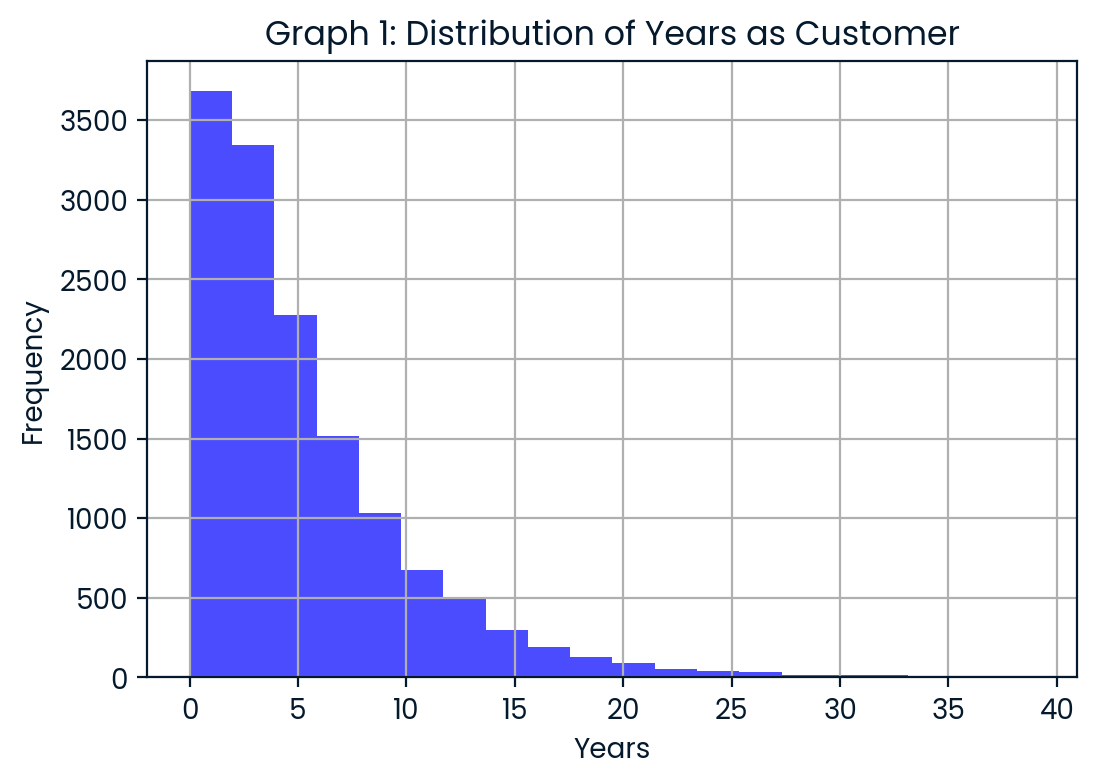

In [24]:
import matplotlib.pyplot as plt

# Histogram for years_as_customer
plt.figure(figsize=(6, 4))
plt.hist(df['years_as_customer'], bins=20, color='blue', alpha=0.7)
plt.title('Graph 1: Distribution of Years as Customer')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The histogram of years_as_customer shows that the majority of customers have been purchasing for a relatively short period, with a peak around zero to a few years. This suggests a large influx of relatively new customers. As the number of years increases, the frequency of customers decreases gradually, with minor peaks observed around 30 years. This pattern indicates that while there are some long-term customers, the majority of customers are newer or have been with the company for a shorter duration.

In addition, we found that we did well to initially discard the values greater than forty because, as we can see, these are atypical values and therefore incorrectly recorded.

As a conclusion drawn from the analysis of this graph, it is evident that while it is understandable not to have customers who have been with the company for over 30 years, given the company's 40-year history, it remains imperative to prioritize efforts towards long-term customer retention strategies. The absence of customers beyond the 30-year mark underscores the natural turnover in customer relationships over time. Nevertheless, investing in strategies aimed at retaining customers over extended periods is crucial. Long-term customers contribute significantly to revenue through repeat purchases and higher lifetime value, which can stabilize revenue streams and reduce reliance on acquiring new customers. Furthermore, these customers often become brand advocates, influencing others positively and enhancing the company's market reputation. Cost efficiencies also favor customer retention, as maintaining strong relationships with long-term customers tends to lower marketing and operational expenses over time. Ultimately, companies with a loyal customer base gain a competitive edge, better equipped to navigate market fluctuations and differentiate themselves through personalized services and robust customer relationships.

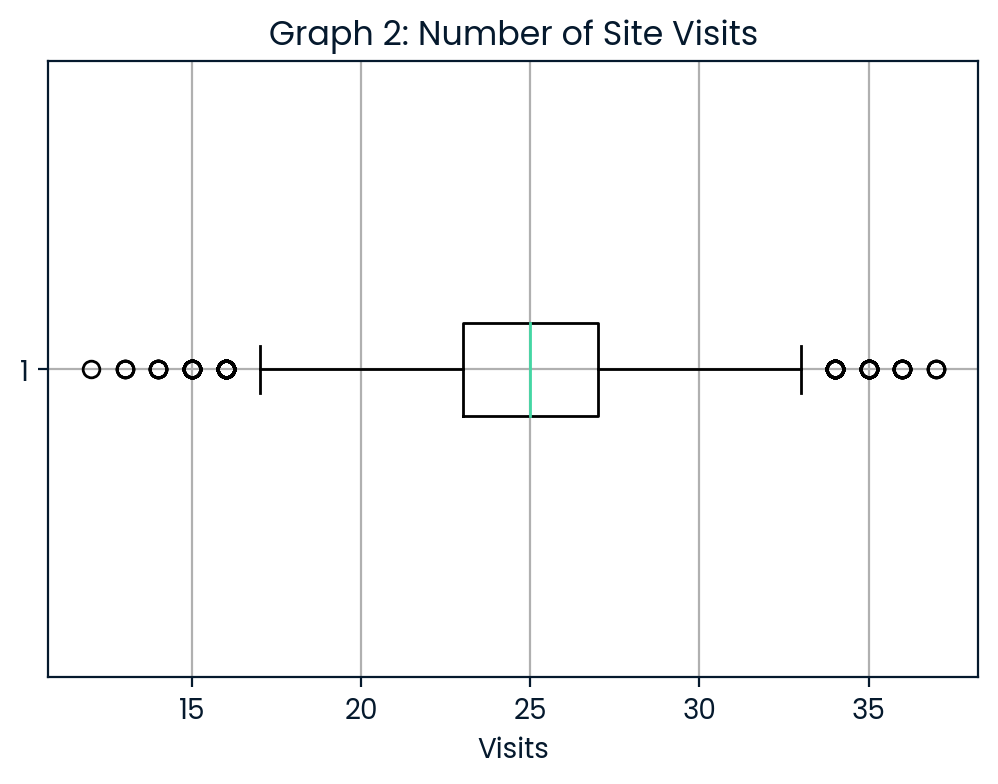

In [25]:
# Boxplot for nb_site_visits
plt.figure(figsize=(6, 4))
plt.boxplot(df['nb_site_visits'], vert=False)
plt.title('Graph 2: Number of Site Visits')
plt.xlabel('Visits')
plt.grid(True)
plt.show()


A boxplot of nb_site_visits with a relatively small box size, a median line centered at the value 25 within the box, and one side of the box near 24 and the other near 26 indicates the following characteristics:

The small box size suggests that the distribution of nb_site_visits is not very spread out, with most values clustered closely around the median. The median line at 25, which indicates that the distribution of the data is symmetric because it is located in the center of the box. The short whiskers extending to 17 on one side and 33 on the other suggest that the majority of the data points lie within this range, indicating a concentrated distribution without many outliers.

However, the presence of circles (outliers) on both sides of the whiskers adds nuance to this distribution. On the left side, there are 5 outliers, indicating values significantly lower than the rest of the data points. On the right side, there are also 5 outliers, with one of them being notably further away from the rest. These outliers suggest that while most nb_site_visits values are tightly clustered around the median, there are still some instances of significantly higher or lower visit frequencies that may warrant further investigation.

All this shows us a clear visual representation of the central tendency.

Thanks to the insights provided by the boxplot, several strategic implications can be drawn. Understanding the distribution of nb_site_visits allows for targeted marketing efforts aimed at increasing engagement with customers who make fewer visits to the website. Addressing the needs of high-frequency visitors can enhance their experience, potentially fostering greater retention and loyalty. Moreover, recognizing the typical customer engagement levels can optimize operational efficiency by aligning resources more effectively with customer behaviors, thereby improving overall service delivery and customer satisfaction.

### **We also want to find out the distribution of revenue and, above all, to be able to answer the question of how revenues are distributed based on the sales methods used. (BUSINESS QUESTIONS)** 

Text(0.5, 1.0, 'Graph 4: The density of Revenue overall')

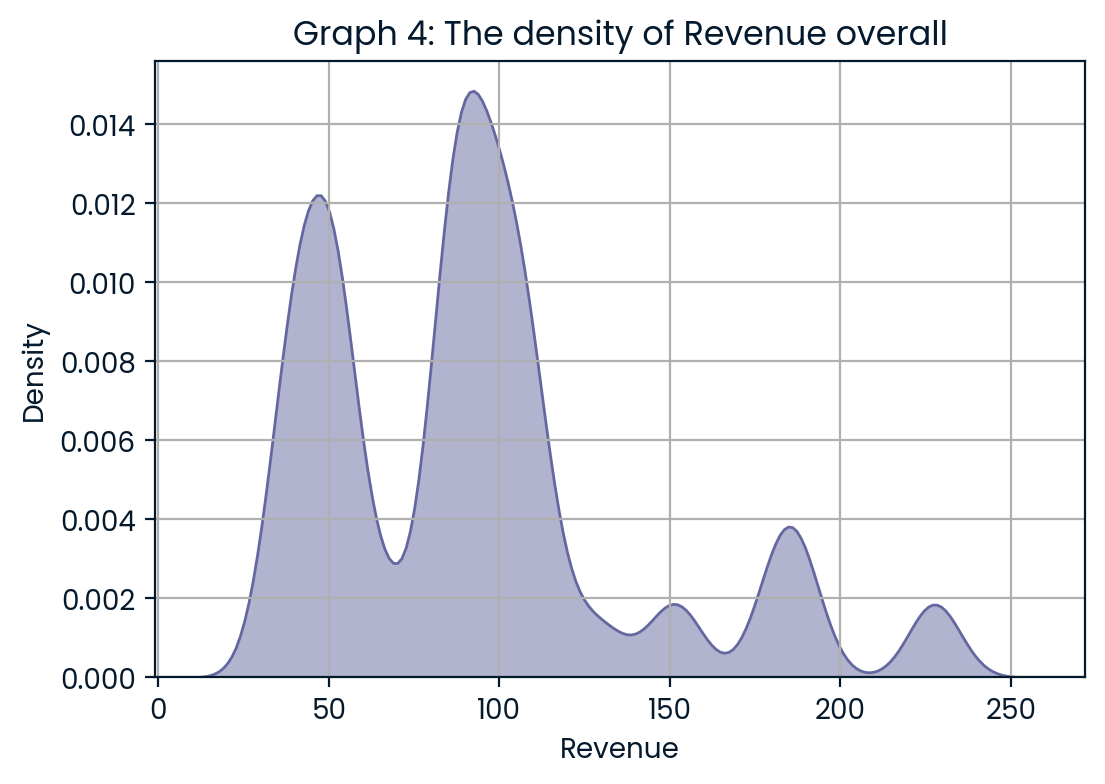

In [26]:
import seaborn as sns
# Plot the density of revenue
plt.figure(figsize=(6, 4))
ax = sns.kdeplot(df, x='revenue', alpha=.5, linewidth=1, fill=True)
plt.xlabel('Revenue')
plt.grid(True)
plt.title('Graph 4: The density of Revenue overall')

Text(0.5, 1.0, 'Graph 5: The density of Revenue in each sales method')

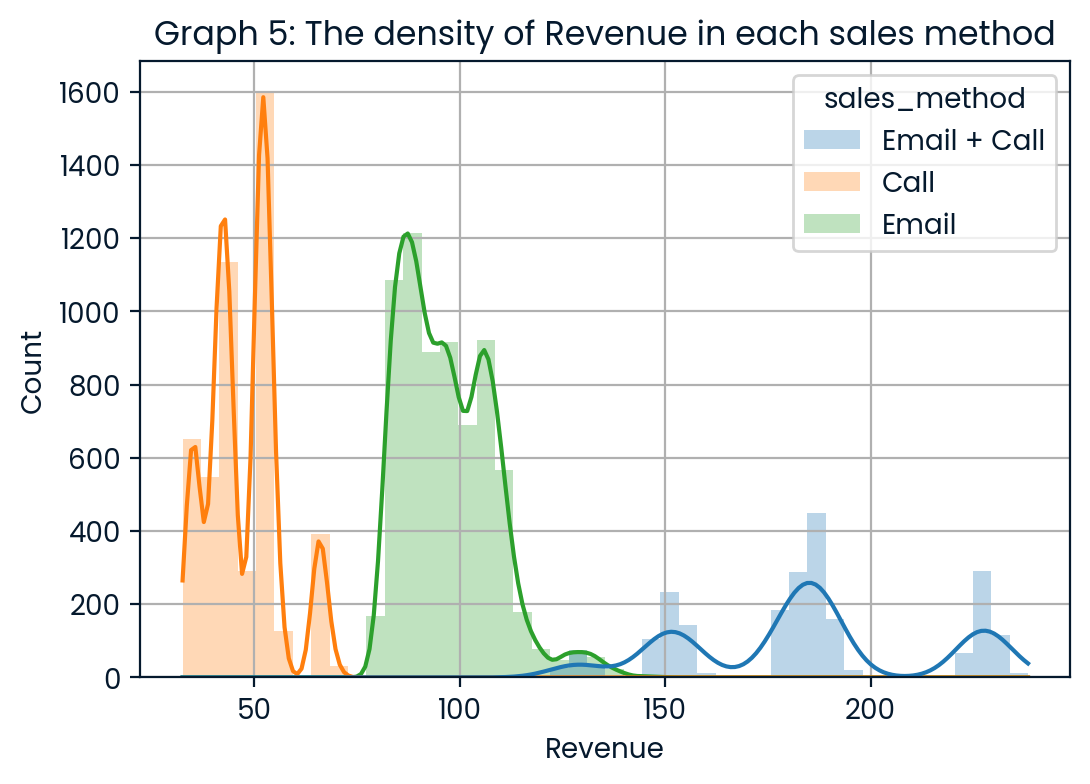

In [27]:
# Plot the density of revenue
plt.figure(figsize=(6, 4))
ax = sns.histplot(df, x='revenue', hue='sales_method', fill=True, palette="tab10", common_norm=True, alpha=.3, linewidth=0, kde=True)
plt.xlabel('Revenue')
plt.grid(True)
plt.title('Graph 5: The density of Revenue in each sales method')


Call IQR:  11.21
Email IQR:  17.290000000000006
Email + Call IQR:  35.33500000000001


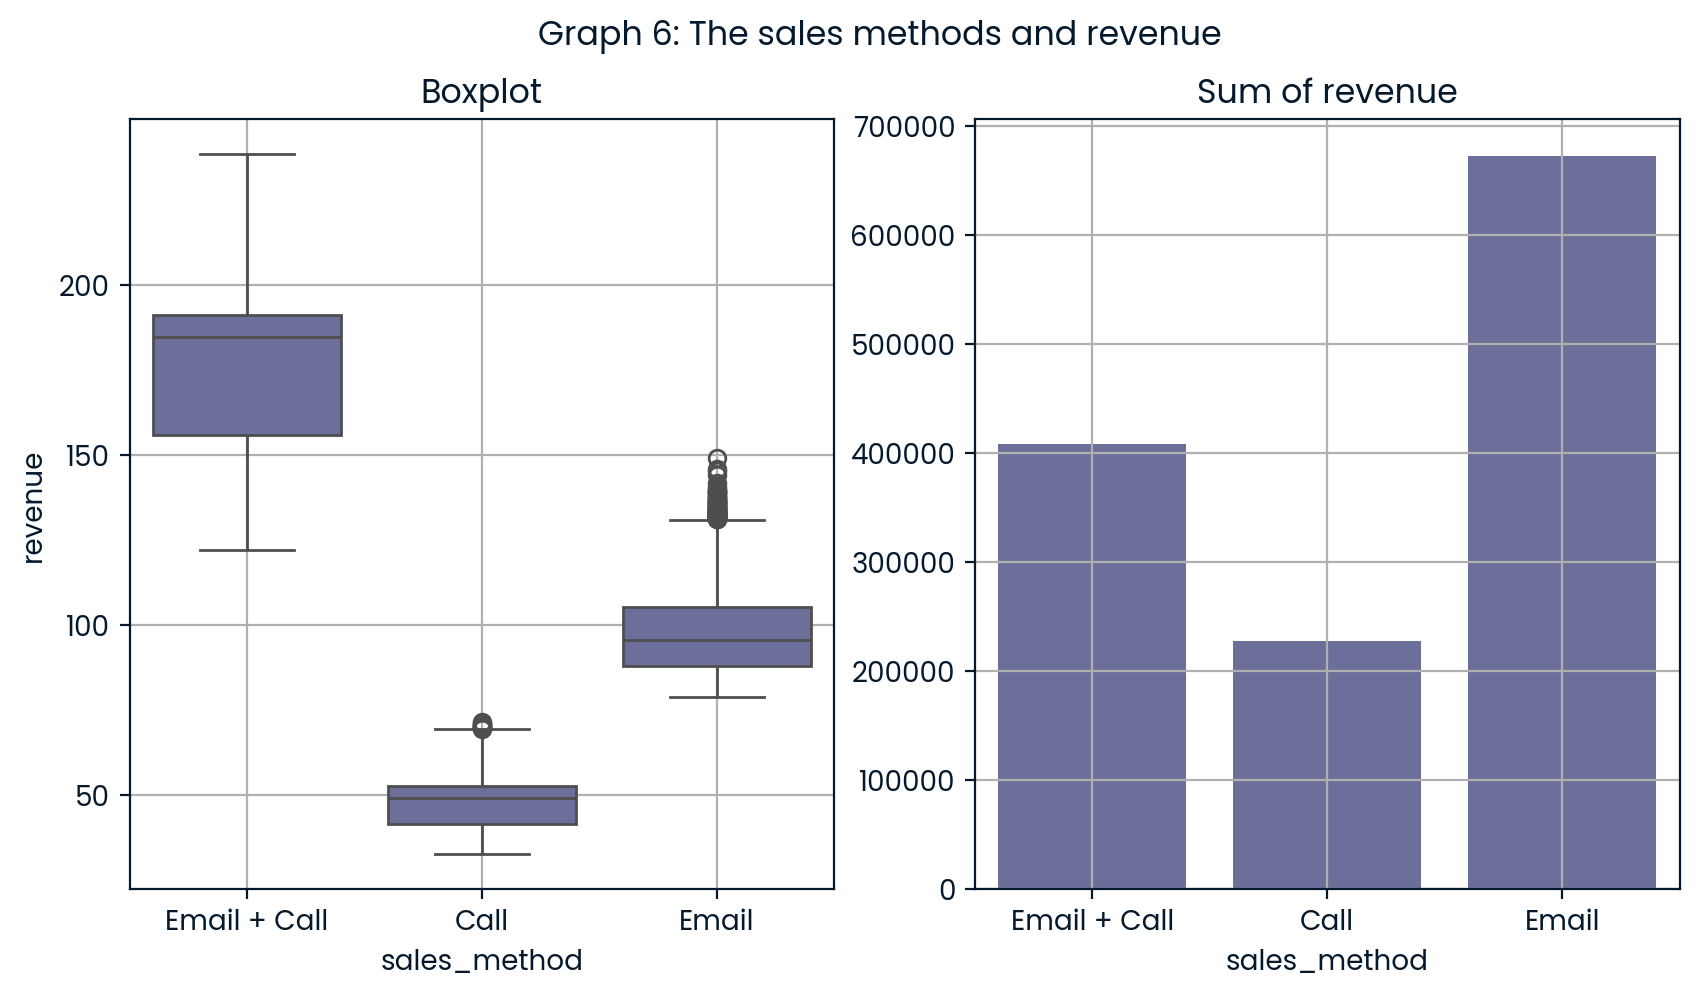

In [28]:
# Boxplot and Count for revenue and sales_methods
from scipy.stats import iqr

order = ['Email + Call', 'Call', 'Email']

fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.boxplot(df, x='sales_method', y='revenue', ax=ax[0], order=order)
plt.grid(True)
revenue_sum = df.groupby('sales_method')['revenue'].sum().to_frame()
sns.barplot(x=revenue_sum.index, y=revenue_sum.revenue, ax=ax[1], order=order)
fig.suptitle('Graph 6: The sales methods and revenue')
ax[0].set_title('Boxplot')
ax[1].set_title('Sum of revenue')
ax[1].set_ylabel('')
ax[0].grid(True)
ax[1].grid(True)

call = df.loc[df.sales_method=='Call', 'revenue']
email = df.loc[df.sales_method=='Email', 'revenue']
email_call = df.loc[df.sales_method=='Email + Call', 'revenue']

print('Call IQR: ', iqr(call))
print('Email IQR: ', iqr(email))
print('Email + Call IQR: ', iqr(email_call))

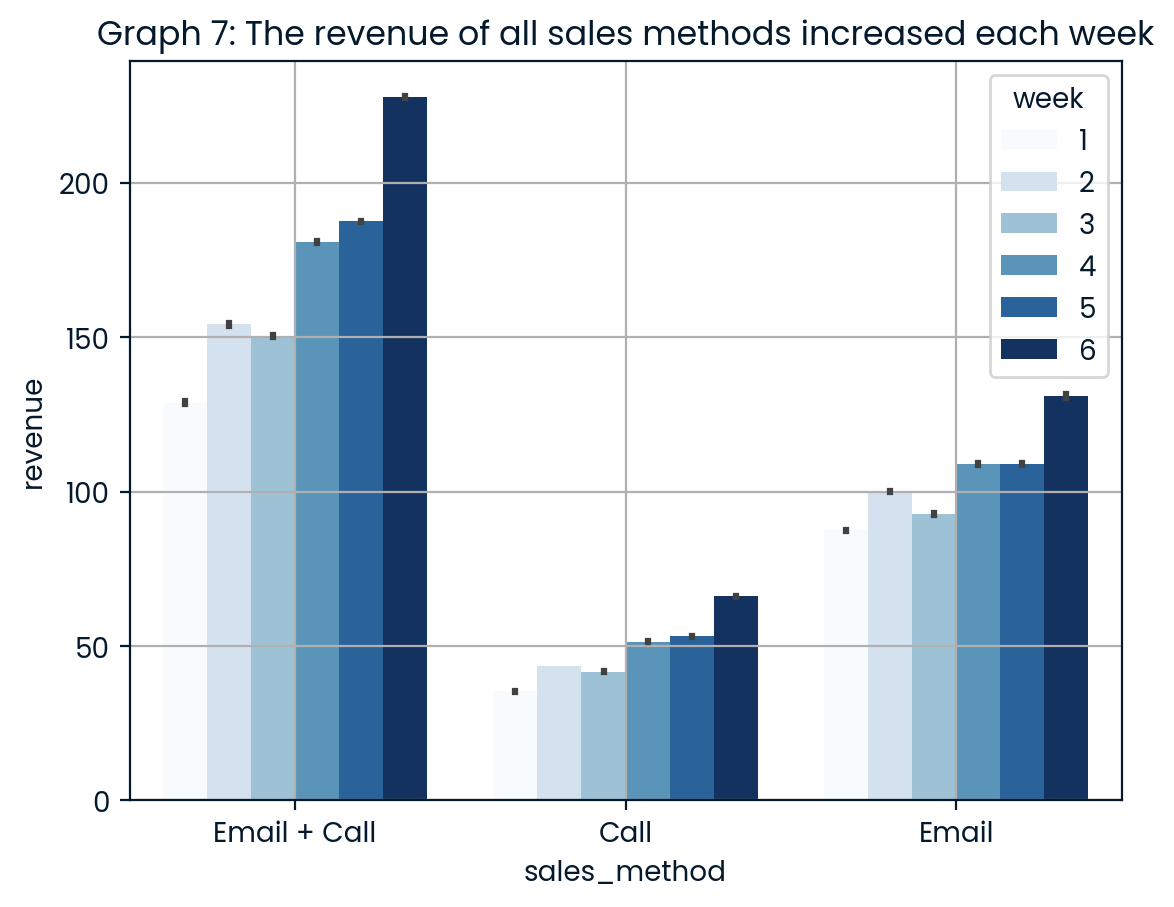

In [29]:
# Revenue in each sales method in each week
sns.barplot(data=df, x="sales_method", y="revenue", hue="week", palette="Blues")
plt.title('Graph 7: The revenue of all sales methods increased each week')
plt.grid(True)

In [30]:
# The mean and medians of the methods' revenue per week 
df.groupby(['week', 'sales_method'])['revenue'].agg(['mean','median']).unstack().style.background_gradient()

**Include at least one graphic showing two or more variables to represent the relationship between features**

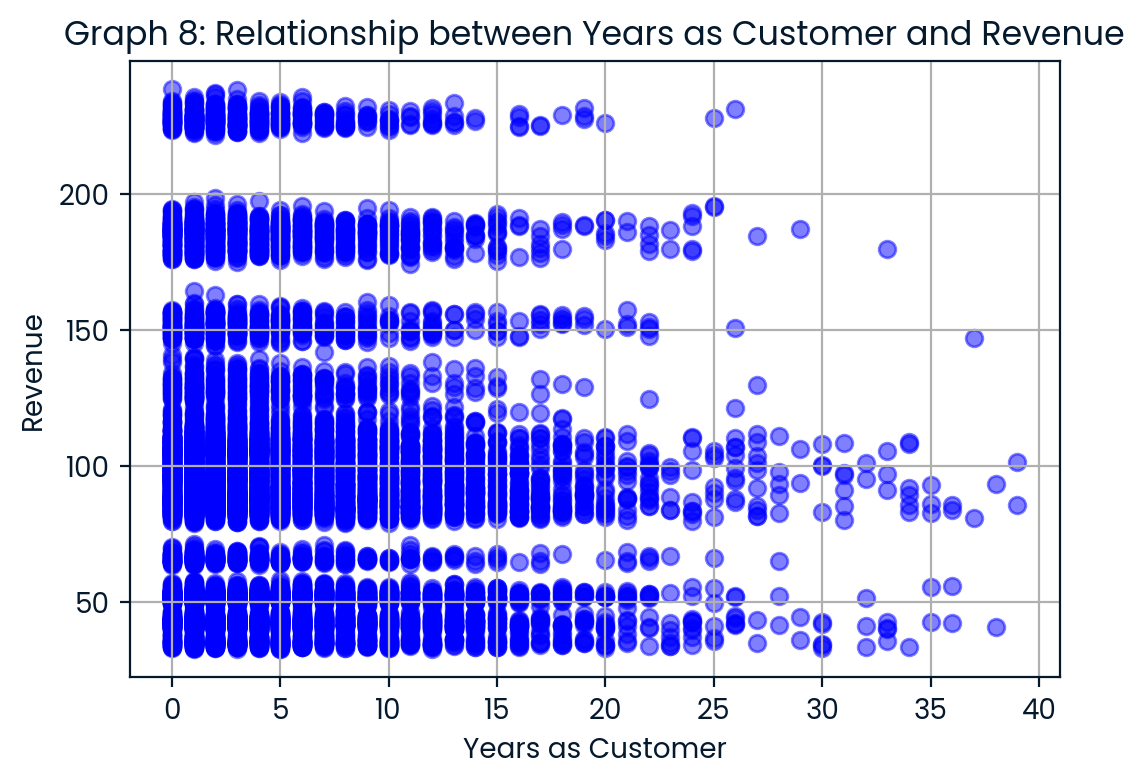

In [31]:

years_as_customer = df['years_as_customer']
revenue = df['revenue']

# Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(years_as_customer, revenue, alpha=0.5, color='blue')
plt.title('Graph 8: Relationship between Years as Customer and Revenue')
plt.xlabel('Years as Customer')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

Initially, one might assume there is a relationship between years_as_customer and revenue. However, since revenue solely reflects earnings from new products, there is no inherent relationship between the variables because new customers, being more numerous than loyal customers, exhibit a wide range of revenue. Nevertheless, one might hypothesize that loyal customers could potentially yield higher profits because of their familiarity with the products and trust in their quality. However, this is not something we can deduce solely from the graph.

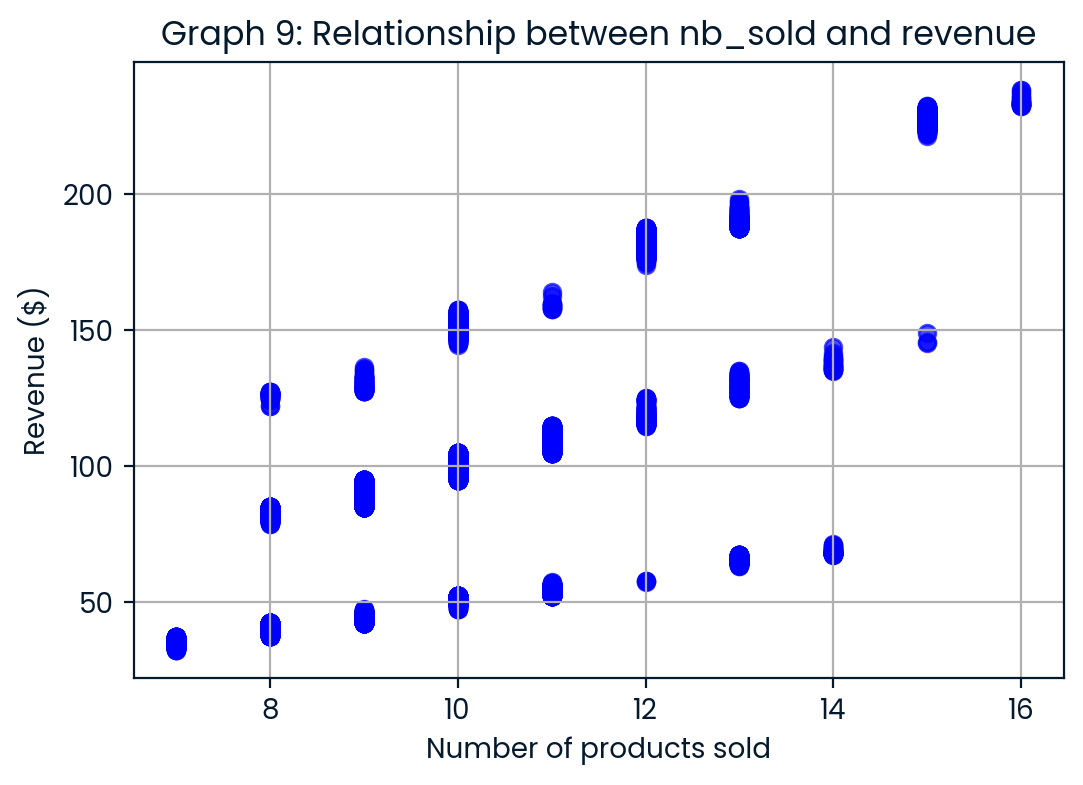

In [32]:
nb_sold = df['nb_sold']
revenue = df['revenue']

# Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(nb_sold, revenue, color='blue', alpha=0.7)
plt.title('Graph 9: Relationship between nb_sold and revenue')
plt.xlabel('Number of products sold')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.show()

The scatter plot clearly shows a direct proportional relationship between nb_sold (number of products sold) and revenue. It's evident that as the number of products sold increases, so does the revenue generated, which aligns with intuitive expectations. However, an interesting observation is the presence of three distinct upward-sloping lines on the graph. This can be attributed to the fact that the sales data pertains to a new product line where not all products within the line are priced equally. This variability in product pricing becomes apparent from the scatter plot, as different combinations of nb_sold and revenue points reflect varying sales volumes and corresponding revenue values, influenced by product pricing differences. Thus, while the overall trend indicates a positive correlation between sales volume and revenue, the presence of multiple upward trends highlights the nuanced impact of product pricing within the new product line.

# **Definition of a metric for the business to monitor**

## **First Metric**

The **Sales Conversion Rate** metric is a key performance indicator used to evaluate the effectiveness of the sales process by measuring the percentage of website visitors who make a purchase. It provides insights into how well a business is able to convert potential customers into actual buyers, thereby indicating the efficiency of its sales strategies and marketing efforts.

The Sales Conversion Rate metric is crucial for businesses as it evaluates how effectively they convert website visitors into customers, indicating the success of their sales strategies. A higher conversion rate suggests that sales and marketing efforts are proficient at attracting and persuading potential customers. Moreover, it provides insights into optimizing marketing techniques by correlating product sales with website visits. A low conversion rate relative to visits signals areas for improvement, such as enhancing website user experience, refining product offerings, or adjusting sales tactics. Continuously tracking this metric offers strategic insights into customer behavior and sales funnel dynamics, empowering businesses to identify trends, address barriers, and make informed decisions to enhance overall sales performance.

The Sales Conversion Rate is calculated as:

$\text{Sales Conversion Rate (\%)} = \left( \frac{\text{Total Number of Products Sold}}{\text{Total Number of Website Visits}} \right) \times 100$

A higher Sales Conversion Rate indicates a more efficient sales process, where a larger proportion of website visitors are converted into paying customers.


- **Can you estimate initial value(s) for the metric based on the current data**

In [33]:
# First, calculate the total number of sales made (sum of nb_sold)
total_sales = df['nb_sold'].sum()

# Then, calculate the total number of website visits
total_visits = df['nb_site_visits'].sum()

# Calculate the sales conversion rate
if total_visits > 0:
    conversion_rate = (total_sales / total_visits) * 100
else:
    conversion_rate = 0

print(f"Sales Conversion Rate: {conversion_rate:.2f}%")

Sales Conversion Rate: 40.25%


- **How should the business use the metric to monitor the business problem**

A Sales Conversion Rate of 40.25% indicates that a significant portion of website visitors are being successfully converted into paying customers. 
It should also be noted that many of the visits to the website are made by the same customer, so it is normal that each time they visit the website they do not buy a product. This is why this sales conversion rate is a great indicator of the efficiency of the sales model.

Here are some conclusions the company can draw from this metric and how it should interpret and utilize it for future decisions:

**1. Effectiveness of Sales and Marketing Strategies**
- A conversion rate of 40.25% is relatively high, suggesting that the current sales and marketing strategies are effective in engaging and converting potential customers.
- The company's efforts in attracting the right audience and guiding them through the sales funnel are yielding positive results.

**2. Customer Engagement and Experience**
- The high conversion rate implies that the website is likely user-friendly, providing a positive customer experience that encourages purchases.
- The product offerings, pricing, and overall value proposition are resonating well with the target audience.

**3. Benchmarking and Goal Setting**
- This conversion rate can serve as a benchmark for future performance. The company should aim to maintain or improve this rate.
- Setting specific goals based on this metric can help in continuously optimizing the sales process and marketing campaigns.

**4. Identifying Opportunities for Improvement**
- While a 40.25% conversion rate is impressive, there is always room for improvement. The company should analyze the remaining 59.75% of visitors who did not convert to understand potential barriers or friction points.
- Insights from this analysis can guide efforts to further enhance the customer journey and address any issues that might be preventing conversions.

**5. Resource Allocation and Strategy Adjustment**
- The company can use this metric to allocate resources more effectively. For instance, investing more in marketing channels that are driving higher conversion rates or improving areas that contribute less effectively.
- Adjusting strategies to focus on high-performing segments can lead to better overall performance and increased revenue.

**6. Long-Term Customer Retention**
- With a high conversion rate, it is also essential to focus on retaining these customers for long-term success.
- Implementing customer retention strategies, such as loyalty programs, personalized marketing, and excellent customer service, can help in maintaining a loyal customer base and sustaining revenue growth.



## **Second Metric**

To evaluate the performance of the new sales methods (Email, Call, Email and Call), we can design a metric called the **Sales Method Efficiency Index (SMEI)**. This metric will consider both the effectiveness of each sales method in generating revenue and the effort required by the sales team to implement these methods.

The SMEI is calculated by dividing the total revenue generated by each sales method by the total effort (in minutes) required for that method. The effort for each method is estimated based on the times provided by the company: 30 minutes per customer for the Call method and 15 minutes per customer for the Email and Call method (5 minutes for the email and 10 minutes for the call). For the Email method, we assume an estimated time of 5 minutes per customer for initial setup and follow-up. By calculating the SMEI, the company can identify the most cost-effective and efficient sales methods, allowing for better resource allocation and optimization of sales processes.

 $\text{SMEI} = \frac{\text{Total Revenue per Sales Method}}{\text{Total Effort per Sales Method (in minutes)}}$

- **Can you estimate initial value(s) for the metric based on the current data**

In [34]:
# Calculate Total Revenue per Sales Method
revenue_email = df[df['sales_method'] == 'Email']['revenue'].sum()
revenue_call = df[df['sales_method'] == 'Call']['revenue'].sum()
revenue_email_call = df[df['sales_method'] == 'Email + Call']['revenue'].sum()

# Calculate Total Customers per Sales Method
customer_email = df[df['sales_method'] == 'Email']['customer_id'].nunique() 
customer_call = df[df['sales_method'] == 'Call']['customer_id'].nunique() 
customer_email_call = df[df['sales_method'] == 'Email + Call']['customer_id'].nunique() 

# Calculate Total Effort per Sales Method
effort_email = df[df['sales_method'] == 'Email']['customer_id'].nunique() * 5
effort_call = df[df['sales_method'] == 'Call']['customer_id'].nunique() * 30
effort_email_call = df[df['sales_method'] == 'Email + Call']['customer_id'].nunique() * 15

# Calculate SMEI for Each Sales Method
smei_email = revenue_email / effort_email if effort_email > 0 else 0
smei_call = revenue_call / effort_call if effort_call > 0 else 0
smei_email_call = revenue_email_call / effort_email_call if effort_email_call > 0 else 0

# Print Total Revenue per Sales Method
print(f"Revenue Email: {revenue_email:.2f}")
print(f"Revenue Call: {revenue_call:.2f}")
print(f"Revenue Email and Call: {revenue_email_call:.2f}")
print('------------------------------------------------------------------------')
# Print Total Customers per Sales Method
print(f"Customer Email: {customer_email}")
print(f"Customer Call: {customer_call}")
print(f"Customer Email and Call: {customer_email_call}")
print('------------------------------------------------------------------------')
# Print the Results
print(f"Sales Method Efficiency Index (Email): {smei_email:.2f}")
print(f"Sales Method Efficiency Index (Call): {smei_call:.2f}")
print(f"Sales Method Efficiency Index (Email and Call): {smei_email_call:.2f}")

Revenue Email: 672220.61
Revenue Call: 227513.02
Revenue Email and Call: 408256.69
------------------------------------------------------------------------
Customer Email: 6921
Customer Call: 4780
Customer Email and Call: 2223
------------------------------------------------------------------------
Sales Method Efficiency Index (Email): 19.43
Sales Method Efficiency Index (Call): 1.59
Sales Method Efficiency Index (Email and Call): 12.24


You can see a higher number of customers who have purchased our products using the email method and therefore a higher number of revenues thanks to this method. But the important thing is to know if these methods are really worth the effort that is put into them.

- **How should the business use the metric to monitor the business problem**

These SMEI values provide valuable insights into the efficiency of each sales method, helping the company make informed decisions for future sales strategies.

**Interpretation of SMEI Values:**

1. **Email Method:**

With an SMEI of 19.43, the Email method is highly efficient, generating a significant amount of revenue relative to the minimal effort required (5 minutes per customer). This suggests that the Email method is a cost-effective approach for reaching and converting customers.

2. **Call Method:**

The Call method has an SMEI of 1.59, indicating that it is the least efficient among the three methods. Despite the higher effort (30 minutes per customer), it generates relatively lower revenue. This method might be resource-intensive and less cost-effective.

3. **Email and Call Method:**

The SMEI of 12.54 for the Email and Call method shows that it is moderately efficient. Combining both email and call efforts (15 minutes per customer) yields better results than the Call method alone, but it is less efficient than the Email method. This approach offers a balance between effort and revenue generation.

This suggests that it is more worthwhile to use the available time to try to reach the largest possible audience using the Email Method. In this way, in a short time we can reach a wide range of customers and therefore obtain greater profits.

From these values we can draw the following conclusions:
The company should optimize resource allocation by focusing more on the highly efficient Email method to maximize revenue with minimal effort. Given the low SMEI for the Call method, its viability should be reassessed, potentially reducing reliance on it or enhancing its effectiveness through refined call scripts or targeting more promising leads. The combined Email and Call method, while less efficient than the Email method alone, offers a balance of effort and revenue and can be used strategically for high-potential customers needing personalized engagement. Regular monitoring of SMEI will allow the company to adjust strategies based on real-time data, ensuring resources are directed towards the most effective approaches.

# **Final summary including recommendations that the business should undertake**

### **Data Validation and Cleaning**

The initial step involved validating and cleaning the dataset to ensure its accuracy and reliability. We verified that all columns were present, checked for missing values, and identified inconsistencies. Specifically, we addressed the following:

- Detected and corrected non-numeric values in the 'revenue' column.
- Ensured all entries in the 'week' column were integers.
- Standardized entries in the 'sales_method' column to ensure consistent formatting.
- Verified the 'state' column against a list of valid U.S. states to identify any incorrect entries.
- Checked the 'customer_id' column for consistency with the required format.
- Validated that the 'years_as_customer' did not exceed the company's age (40 years).

### **Exploratory Analysis**

**Single Variable Analysis**

Years as Customer:

- A histogram showed the highest frequency of customers with few years of engagement, tapering off significantly after 30 years. This is expected since the company was founded 40 years ago. However, it highlights the need for long-term customer retention strategies.
- Recommendation: Develop loyalty programs and personalized marketing to retain long-term customers.

Number of Site Visits:

- A boxplot revealed a relatively small interquartile range around the median of 25 visits, with some outliers. This suggests most customers visit the site around the same number of times.
- Recommendation: Analyze the behavior of outliers to understand what drives higher or lower engagement and tailor strategies accordingly.

**Multi-Variable Analysis**

Relationship Between nb_sold and revenue:

- A scatter plot indicated a clear positive relationship, confirming that more products sold lead to higher revenue. Three distinct ascending lines suggested different product price tiers within the new product line.
- Recommendation: Consider focusing marketing efforts on higher-priced products to maximize revenue or examine the pricing strategy to balance volume and revenue.

Relationship Between years_as_customer and revenue:

- It was initially hypothesized that longer customer tenure might correlate with higher revenue. However, since revenue only includes new products, this relationship was not evident.
- Recommendation: Implement strategies to upsell new products to long-term customers who are likely familiar with and trust the brand.

**Business Questions**

Based on the analysis, it's clear that each sales method—Email, Call, and Email + Call—has distinct characteristics in terms of revenue spread and median values. The Email + Call method, despite requiring more effort, shows the highest potential for revenue growth over time. However, the Email method stands out for its efficiency in achieving significant revenue with minimal team effort, making it a practical choice for maximizing reach and profitability. Balancing these factors, the Email + Call method remains recommended for its ability to generate higher revenues, albeit requiring more resources, while the Email method proves effective for its productivity and broader customer engagement potential.

### **Definition of a Metric**

**Sales Conversion Rate**

The percentage of website visits that result in sales is defined. With a current conversion rate of 40.25%, the company shows strong performance, but there's room for optimization.

The recommendation is to use this metric to track and enhance the effectiveness of sales and marketing strategies. Aim to improve the conversion rate by refining the customer journey on the website and targeting high-potential visitors.

**Sales Method Efficiency Index (SMEI)**

The SMEI is presented to evaluate the performance of sales methods.

The values obtained indicate that the Email method is the most efficient, while the Call method is the least efficient.

**Recomendations**:
To optimize sales strategies, the company should prioritize the Email method for its high efficiency in generating revenue with minimal effort. This entails increasing investment in email marketing campaigns and automation tools to enhance effectiveness. The Call method, due to its lower efficiency, requires reassessment; strategies could include refining scripts, providing additional sales training, or focusing efforts on more promising leads. Leveraging combined methods like Email and Call for high-potential customers can balance effort and revenue effectively. Continuous monitoring of metrics like the Sales Method Efficiency Index (SMEI) and Sales Conversion Rate is crucial, allowing for real-time adjustments and ensuring resources are allocated to the most effective approaches through the implementation of a robust analytics system.